# DB 에 데이터 추가하기
화면 개발을 통한 데이터 입력 외에 Django 는 아래와 같은 방식으로 데이터 추가 입력이 가능하다.

#### 데이터 조작을 위한 3가지 방법
1. View 로 제공되는 페이지에서 정보를 입력하고 트랜잭션을 통해 모델에 입력
2. 서버 개발자가 admin 페이지에서 직접 데이터 추가
3. 서버 개발자가 django shell 을 이용하여 직접 데이터 추가

## 1. Admin 페이지 를 이용한 데이터 등록
Django 는 기본적인 관리자 페이지를 제공 한다. 아래 URL 을 이용하여 관리자 페이지에서 모델내 데이터 정보를 등록/수정 할 수 있다.

!python manage.py runserver  
http://127.0.0.1:8000/admin/ 

In [6]:
## 관리자 ID/PW 설정하기
!cd.. && python manage.py createsuperuser

Superuser creation skipped due to not running in a TTY. You can run `manage.py createsuperuser` in your project to create one manually.


### 실제 리눅스 쉘 환경이 아닌 경우의 대처 법

Superuser creation skipped due to not running in a TTY 는 가상 터미널 환경에서의 접속을 감지한 쟝고측 에러 메세지로 이를 우회하기 위해서는 `winpty` 라는 명령을 추가하여 실행한다.

```python
!winpty python manage.py createsuperuser
```

In [7]:
# 명령어 실행 시 관리자 계정, 비밀번호, 이메일 정보를 설정 하게 된다.
!winpty python manage.py createsuperuser

In [ ]:
# 이후 관리자 페이지 접속
http://127.0.0.1:8000/admin/ 

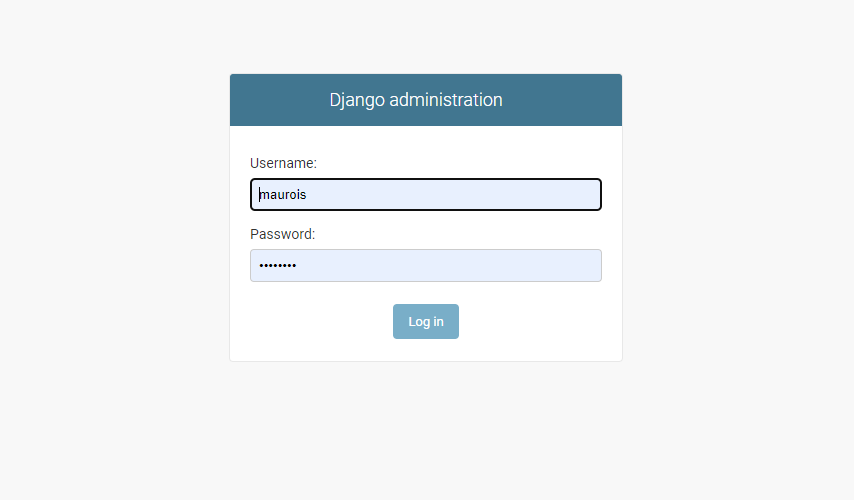

## 2. Admin 페이지내 관리 모델 추가하기
관리자 페이지에서 Models 정보를 인식시키기 위해서는 [App]/admin.py 파일 내 모델 정보를 등록 시켜야 한다.

admin.py 는 관리 속성을 정의해놓은 파일이다. 

In [1]:
# 빈파일 내 모델 정보를 admin.site 속성에 추가 확인
!cat ../polls/admin.py

from django.contrib import admin
from .models import Question, Choice

admin.site.register(Question)
admin.site.register(Choice)


### admin.site 속성에 추가된 정보는 아래와 같이 나타난다.
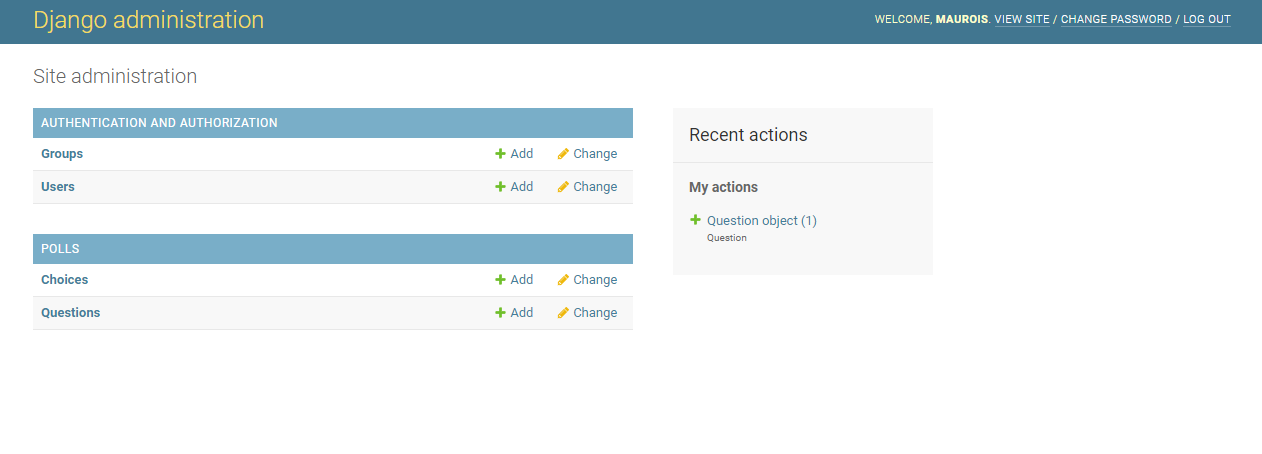

## 3. Admin 사이트를 통해 데이터 입력하기

관리객체들은 [+Add ] 버튼을 통해 수동으로 데이터를 입력 할 수 있다.


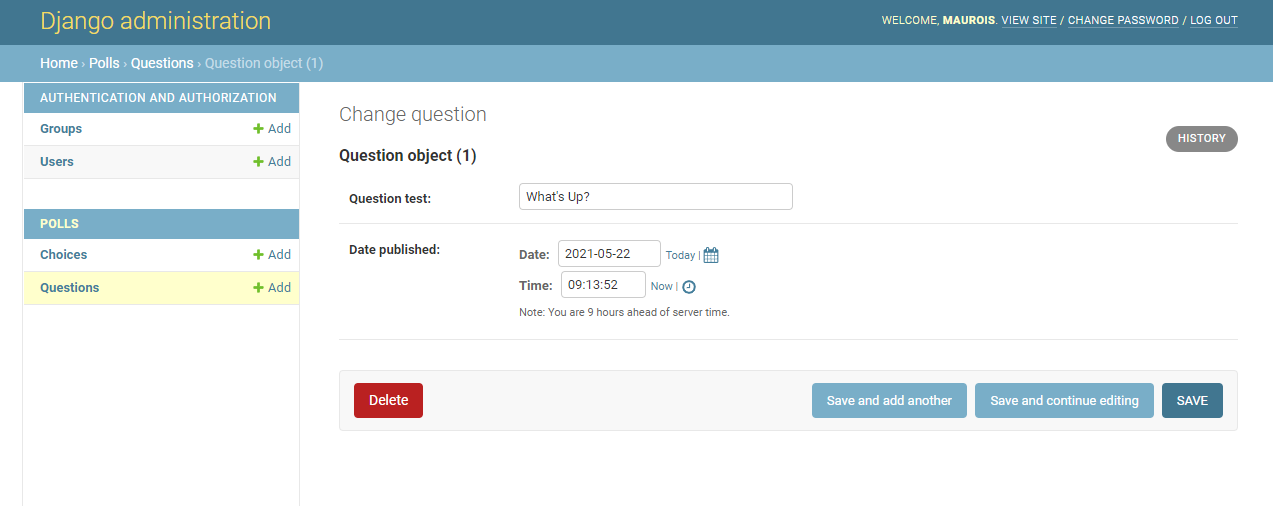

## 4. 장고 Shell 을 이용하여 데이터 추가하기

Django Framework 은 파이썬 내에서 구동되지만 자체 Shell 을 통하여 명령어를 직접 사용할 수도 있다.

```python 
python manage.py shell
```

In [ ]:
# 장고 쉘
!cd.. && python manage.py shell


```python
python manage.py shell
# 데이터 모델 import
>>> from polls.models import Choice, Question
>>> from django.utils import timezone

[전체조회]
# 모델 내 모든 데이터 출력
>>> Question.objects.all()
<QuerySet []>

[등록]
# Question 객체에 새로운 데이터 입력
>>> q = Question(question_text="What's new?", pub_date=timezone.now())
>>> q.save()

[조회]
# 방금 저장된 데이터의 id 확인
>>> q.id
1

# 방금 저장된 데이터의 question_test 확인
>>> q.question_text
"What's new?"

# 방금 저장된 데이터의 pub_date 확인
>>> q.pub_date
datetime.datetime(2012, 2, 26, 13, 0, 0, 775217, tzinfo=<UTC>)

[수정]
# 방금 저장된 데이터를 변경하고 다시 저장하기
>>> q.question_text = "What's up?"
>>> q.save()

[전체조회]
>>> Question.objects.all()
<QuerySet [<Question: Question object (1)>]>
```

### Model 정보 출력시 개별 속성 값을 확인 하기 위해서는 __str__ 항목을 재정의 하여야 한다.

In [3]:
# __str__ 속성 재정의 확인
!cat ../polls/models.py

from django.db import models

# decalred ORM Information (Object Relation Mapping)
class Question(models.Model):
    question_test = models.CharField(max_length=200)
    pub_data = models.DateTimeField('date published')
    
    def __str__(self):
        return self.question_text
    
class Choice(models.Model):
    question = models.ForeignKey(Question, on_delete=models.CASCADE) # FK �뿰寃�
    
    choice_text = models.CharField(max_length=200)
    vote = models.IntegerField(default=0)    
    
    def __str__(self):
        return self.choice_text


### __str__ 재정의로 objects.all 메소드 호출시 각 항목의 저장 text 가 리턴 된다.

```python
>>> Question.objects.all()
<QuerySet [<Question: What's up?>]>
```